In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
import scipy.io as sio

In [2]:
data=sio.loadmat('ex3data1.mat')

In [3]:
X=data['X']
y=data['y']

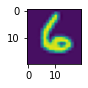

In [4]:
fig=plt.figure(figsize=(1,1))
plt.imshow(X[3450].reshape(20,20).T)
plt.show()

In [5]:
X=np.insert(X,0,values=1,axis=1)

In [6]:
y=y.flatten()

In [7]:
def sigmoid(z):
    h=1/(1+np.exp(-z))
    return h

In [8]:
def costFun(theta,x,y,lam):
    reg=theta[1:]@theta[1:]*lam/(2*len(y))
    h=sigmoid(x@theta)
    inner=y*np.log(h)+(1-y)*np.log(1-h)
    cost=-np.sum(inner)/len(y)+reg
    return cost

In [9]:
#theta=array[[],[],[],[]]
#reg=array([],[],[])
def gradi(theta,x,y,lam):
    reg=lam*theta[1:]/len(y)
    reg=np.insert(reg,0,values=0,axis=0)
    grad=x.T@(sigmoid(x@theta)-y)/len(y)
    return grad+reg

In [10]:
lam=1
#theta=np.zeros((len(X[1]),)) # scipy.minimize接受的数据格式为一维的特征向量
#best=minimize(costFun,theta,args=(X,y,lam),method='TNC',jac=gradi)

In [11]:
#k:0-9共十个classes
#size(theta_all)=(K,n):每一列是一个特征的分类预测所得的概率结果
theta_all=np.zeros((10,len(X[1])))
for i in range(1,11):
    theta_i=np.zeros((len(X[1]),))
    best=minimize(costFun,theta_i,args=(X,y==i,lam),method='TNC',jac=gradi)
    theta_all[i-1,:]=best.x #solution value
    

In [12]:
print(theta_all)

[[-2.38301230e+00  0.00000000e+00  0.00000000e+00 ...  1.30434175e-03
  -7.40003732e-10  0.00000000e+00]
 [-3.18588120e+00  0.00000000e+00  0.00000000e+00 ...  4.45858778e-03
  -5.08315413e-04  0.00000000e+00]
 [-4.79483718e+00  0.00000000e+00  0.00000000e+00 ... -2.86628040e-05
  -2.46838905e-07  0.00000000e+00]
 ...
 [-7.98900972e+00  0.00000000e+00  0.00000000e+00 ... -8.94542182e-05
   7.21045847e-06  0.00000000e+00]
 [-4.57182010e+00  0.00000000e+00  0.00000000e+00 ... -1.33622521e-03
   9.98633700e-05  0.00000000e+00]
 [-5.40510945e+00  0.00000000e+00  0.00000000e+00 ... -1.16565605e-04
   7.87250688e-06  0.00000000e+00]]


In [30]:
prob=sigmoid(X@theta_all.T)
choose=np.argmax(prob,axis=1)#每一行中的最大数，返回列的坐标index
print(choose+1)
print(y[:5])

[10 10 10 ...  9  9  7]
[10 10 10 10 10]


In [31]:
index=choose+1# index[0-9], corresponding number:[1-10]
np.mean(index==y)

0.9446

In [32]:
m=np.array([[2,33],[3,2],[4,6],[5,4]])

In [33]:
m

array([[ 2, 33],
       [ 3,  2],
       [ 4,  6],
       [ 5,  4]])

In [34]:
np.argmax(m,axis=1)

array([1, 0, 1, 0], dtype=int64)

In [36]:
y==10

array([ True,  True,  True, ..., False, False, False])